# Neural Network Classifiers

## Xander Hieken

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
pd.set_option('display.max_colwidth', -1)

/Users/xander/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/Users/xander/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Part 1: Classifying Text
### A. Neural Network Classifier with Scikit-learn
Using `categorized-comments.json`, fit a neural network classifier using scikit-learn. 

Report the accuracy, precision, recall, F1-score, and confusion matrix.

In [2]:
def load_jsonl(input_path) -> list:
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    return data

myData = load_jsonl('categorized-comments.jsonl')

db_data = []
db_cols = ['cat', 'txt']
for d in myData:
    db_data.append([])
    for col in db_cols:
        db_data[-1].append(d.get(col, float('nan')))
        
df = pd.DataFrame(db_data, columns=db_cols)

df = df.sample(n=20000)
# The complete dataset takes way too long to run on my computer.
# I am using a random sample of 20,000 rows

In [3]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['txt'])
y = df['cat']

# Creates an 80/20 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiates an MLPClassifier with 3 hidden layers of 50 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50))

mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)

Accuracy:  0.61975 



/Users/xander/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/xander/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


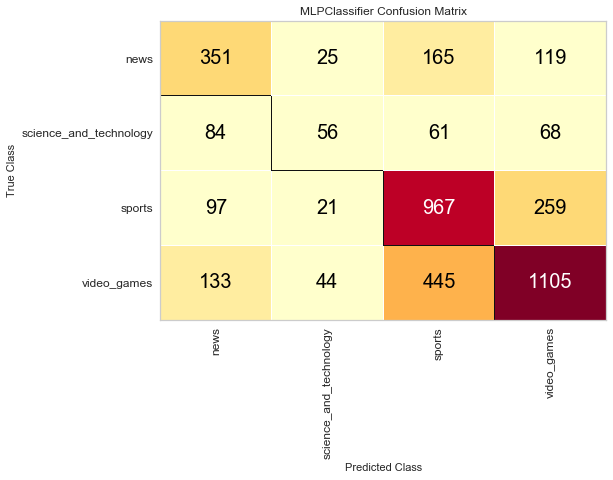

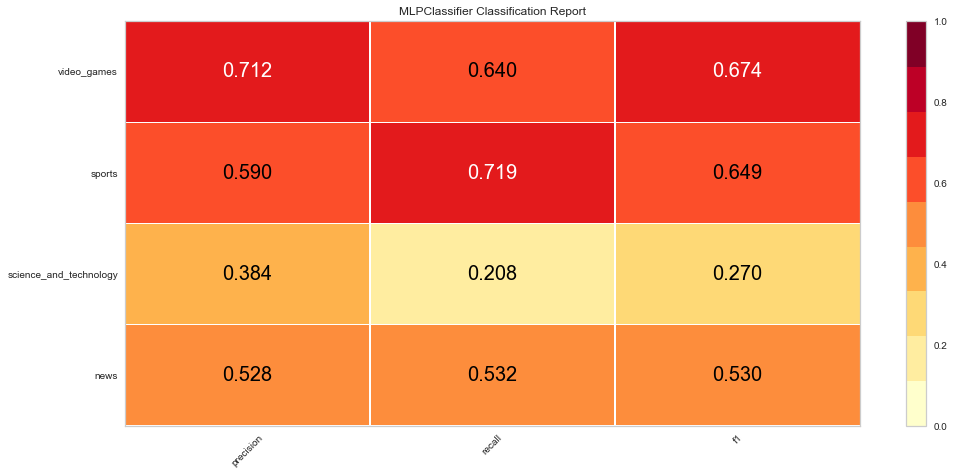

In [4]:
# Calculating the accuracy
print('Accuracy: ', accuracy_score(y_test, predictions),'\n')

classes = ['news', 'science_and_technology', 'sports', 'video_games']

# Generating the confusion matrix
cm = ConfusionMatrix(mlp, classes=classes, percent=False)

# Evaluate the model on the test data
cm.score(X_test, y_test) 

for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

# Adjusting the size of the plot and labels
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Generating the classification report for precision, recall, and F1-score
visualizer = ClassificationReport(mlp, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  

# Evaluate the model on the test data
visualizer.score(X_test, y_test)  

g = visualizer.poof()

### B. Neural Network Classifier with Keras

Using the same dataset, fit a neural network classifier using Keras. 

Report the accuracy, precision, recall, F1-score, and confusion matrix.

In [5]:
def build_network():
    """Create a function that returns a compiled neural network"""
    nn = Sequential()
    nn.add(Dense(100, activation = 'relu', input_shape = (N_FEATURES,)))
    
    nn.add(Dense(100, activation = 'relu'))
    nn.add(Dense(N_CLASSES, activation = 'softmax'))
    
    nn.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy'])
    
    return nn

In [6]:
# The number of features (words in a comment) will vary because of the random train/test split
# Setting the number of features this way makes the code more flexible
N_FEATURES = X_test.shape[1]
N_CLASSES = 4

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['txt'])
y = df['cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kc = KerasClassifier(build_fn = build_network, epochs = 15)

kc.fit(X_train,y_train)

y_pred = kc.predict(X_test)

Epoch 1/15
16000/16000 [==============================] - 15s 964us/step - loss: 0.9459 - accuracy: 0.5964
Epoch 2/15
16000/16000 [==============================] - 16s 970us/step - loss: 0.4910 - accuracy: 0.8052
Epoch 3/15
16000/16000 [==============================] - 16s 972us/step - loss: 0.2801 - accuracy: 0.8889
Epoch 4/15
16000/16000 [==============================] - 16s 970us/step - loss: 0.2005 - accuracy: 0.9141
Epoch 5/15
16000/16000 [==============================] - 16s 972us/step - loss: 0.1624 - accuracy: 0.9279
Epoch 6/15
16000/16000 [==============================] - 16s 970us/step - loss: 0.1432 - accuracy: 0.9324
Epoch 7/15
16000/16000 [==============================] - 15s 967us/step - loss: 0.1302 - accuracy: 0.9407
Epoch 8/15
16000/16000 [==============================] - 15s 967us/step - loss: 0.1210 - accuracy: 0.9434
Epoch 9/15
16000/16000 [==============================] - 15s 969us/step - loss: 0.1176 - accuracy: 0.9436
Epoch 10/15
16000/16000 [============

Accuracy:  0.629 

                        precision    recall  f1-score   support

                  news       0.54      0.56      0.55       660
science_and_technology       0.36      0.20      0.26       269
                sports       0.65      0.65      0.65      1344
           video_games       0.67      0.71      0.69      1727

              accuracy                           0.63      4000
             macro avg       0.56      0.53      0.54      4000
          weighted avg       0.62      0.63      0.62      4000
 



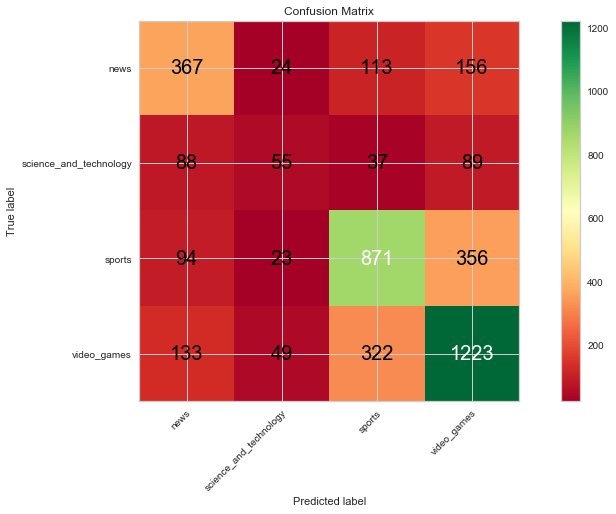

In [7]:
class_names = ['news', 'science_and_technology', 'sports', 'video_games']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.RdYlGn):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax

print('Accuracy: ', accuracy_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred),'\n')
plot_confusion_matrix(y_test, y_pred, classes = class_names, title = 'Confusion Matrix')

plt.show()

***
## Part 2: Classifying Images
Using the MNIST database of handwritten digits from Keras (example below)
![MNIST Images](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [8]:
# Set that the color channel value will be first
K.set_image_data_format("channels_first")

# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28

# Load data and target from MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape training image data into features
X_train = X_train.reshape(X_train.shape[0], channels, height, width)

# Reshape test image data into features
X_test = X_test.reshape(X_test.shape[0], channels, height, width)

# Rescale pixel intensity to between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

# One-hot encode target
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
number_of_classes = y_test.shape[1]

# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters = 64,
                   kernel_size = (5, 5),
                   input_shape = (channels, width, height),
                   activation = 'relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size = (2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation = "relu"))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation = "softmax"))

# Compile neural network
network.compile(loss = "categorical_crossentropy", # Cross-entropy
                optimizer = "rmsprop", # Root Mean Square Propagation
                metrics = ["accuracy"]) # Accuracy performance metric

# Train neural network
network.fit(X_train, # Features
            y_train, # Target
            epochs = 5, # Number of epochs
            verbose = False, # Don't print description after each epoch
            batch_size = 1000, # Number of observations per batch
            validation_data = (X_test, y_test)) # Data for evaluation

In [9]:
score, acc = network.evaluate(X_test, y_test, batch_size = 1000)
print('Test score (loss):', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 136us/step
Test score (loss): 0.04186099860817194
Test accuracy: 0.9857000112533569
